In [1]:
import time
import hypergraph
import randomization
import matplotlib.pyplot as plt

In [2]:
#hypergraph_name = 'syn100'
hypergraph_name = 'syn1000'
H = hypergraph.read_hypergraph(hypergraph_name)

In [3]:
H.print_info()

Number of nodes: 1000
Number of hyperedges: 4996
Average degree of node: 15.992
Maximum degree of node: 66
Frequency distribution of node degree: {50: 1, 29: 5, 19: 47, 66: 1, 25: 7, 63: 2, 43: 3, 23: 16, 24: 14, 57: 1, 28: 5, 21: 34, 38: 1, 30: 4, 37: 3, 26: 6, 22: 22, 36: 2, 39: 1, 44: 1, 40: 1, 15: 103, 20: 42, 11: 58, 18: 86, 16: 78, 9: 26, 14: 89, 17: 82, 27: 5, 12: 80, 13: 86, 8: 22, 10: 51, 7: 9, 6: 4, 5: 2}
Average size of hyperedge: 3.200960768614892
Maximum size of hyperedge: 5
Frequency distribution of hyperedge size: {2: 1996, 3: 1000, 4: 1000, 5: 1000}
Hypergraph is connected: True



In [4]:
fontsize = 25
plt.rcParams["font.size"] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 7.5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7.5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['hatch.linewidth'] = 0.2

# Plot function
def compare_properties(H: hypergraph.HyperGraph, randH: hypergraph.HyperGraph):
    
    fig = plt.figure(figsize=(12, 12))
    
    ### Node degree distribution
    H_dd = H.node_degree_distribution(func='survival')
    randH_dd = randH.node_degree_distribution(func='survival')
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.scatter(list(H_dd.keys()), list(H_dd.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax1.scatter(list(randH_dd.keys()), list(randH_dd.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax1.set_xlim(left=0.5)
    #ax1.set_ylim(top=1.0)
    ax1.legend(loc='lower left', frameon=False, fontsize=20)
    ax1.set_title("Node degree distribution", fontsize=20)
    
    ### Average degree of nearest neighbors of nodes with degree k
    H_knn = H.average_degree_of_nearest_neighbors_of_nodes()
    randH_knn = randH.average_degree_of_nearest_neighbors_of_nodes()
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.set_xscale('log')
    #ax2.set_yscale('log')
    ax2.scatter(list(H_knn.keys()), list(H_knn.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax2.scatter(list(randH_knn.keys()), list(randH_knn.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax2.set_xlim(left=0.5)
    ax2.set_ylim(bottom=0, top=max(max(H_knn.values()), max(randH_knn.values()))*1.05)
    ax2.set_title("Average degree of nearest neighbors\nof nodes with degree k", fontsize=20)
    
    ### Degree-dependent redundancy coefficient of the node
    H_drc = H.degree_dependent_node_redundancy_coefficient()
    randH_drc = randH.degree_dependent_node_redundancy_coefficient()
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.scatter(list(H_drc.keys()), list(H_drc.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax3.scatter(list(randH_drc.keys()), list(randH_drc.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    #ax3.set_xlim(left=0.5)
    #ax3.set_ylim(bottom=0, top=max(max(H_drc.values()), max(randH_drc.values()))*1.05)
    ax3.set_title("Degree-dependent redundancy\ncoefficient of the node", fontsize=20)
    
    ### Hyperedge size distribution
    H_hs = H.hyperedge_size_distribution(func='survival')
    randH_hs = randH.hyperedge_size_distribution(func='survival')
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.set_xscale('log')
    ax4.set_yscale('log')
    ax4.scatter(list(H_hs.keys()), list(H_hs.values()), color="tomato", linewidths=2, s=150, label="Original", marker='o', facecolor="None")
    ax4.scatter(list(randH_hs.keys()), list(randH_hs.values()), color="gray", linewidths=2, s=150, label="Randomized", marker='+')
    ax4.set_title("Hyperedge size distribution", fontsize=20)
    
    #plt.legend(loc='upper center', bbox_to_anchor=(0, -.15), frameon=False, handletextpad=0.3, ncol=2)
    fig.tight_layout()
    plt.show()

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.228
Node degree correlation 0.3887147686988359
Node redundancy 0.9227066689629684
Hyperedge size distribution 0.6104883907125701
Elapsed time (sec):  0.07919502258300781


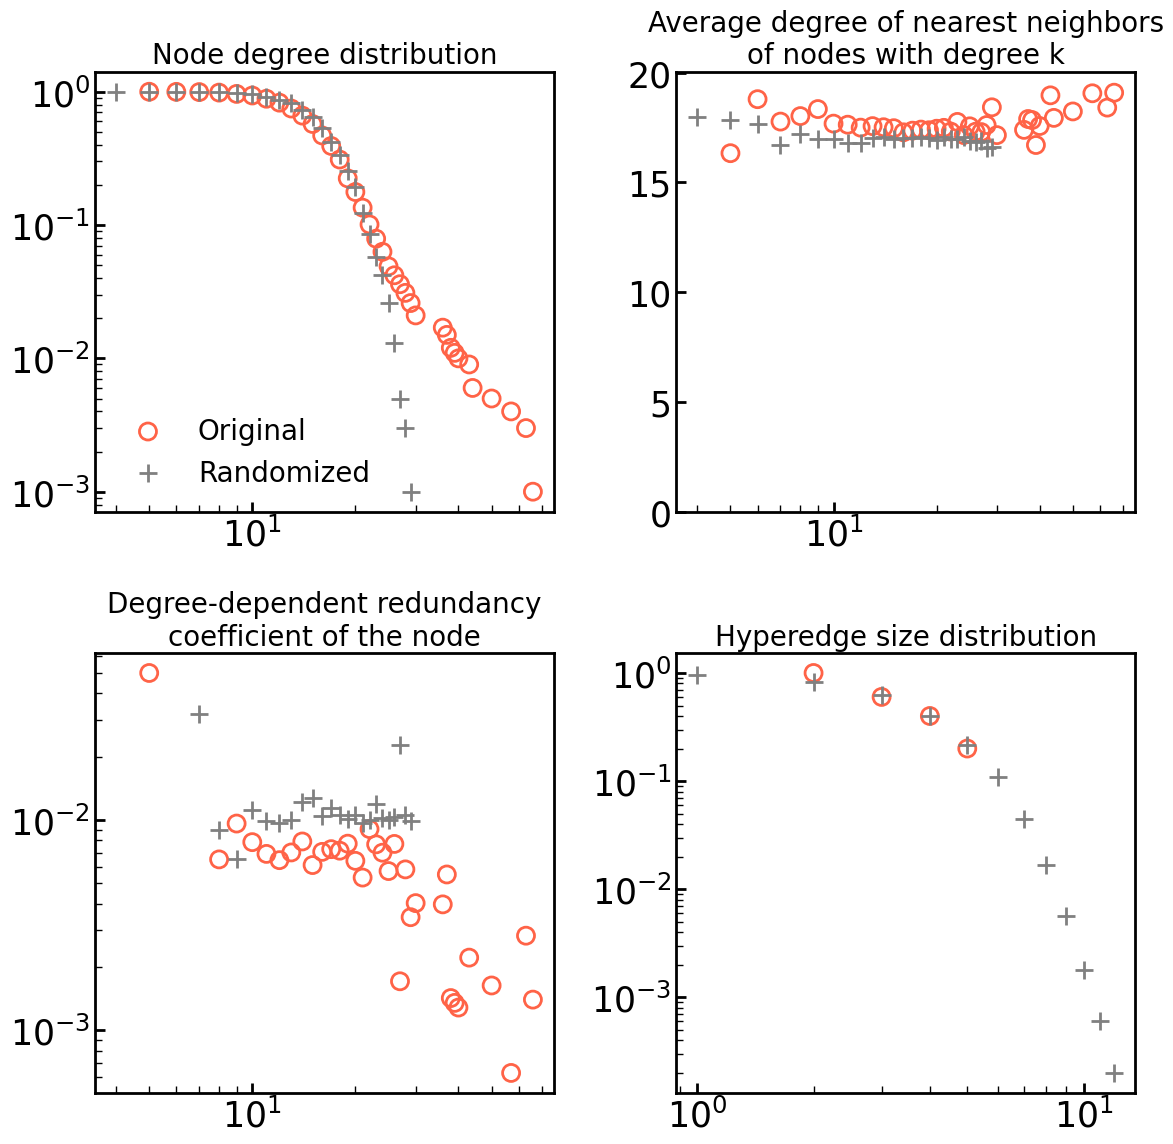

In [5]:
(d_v, d_e) = ("0", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.15990906746070133
Node redundancy 1.272928251760161
Hyperedge size distribution 0.6269015212169736
Elapsed time (sec):  0.0225069522857666


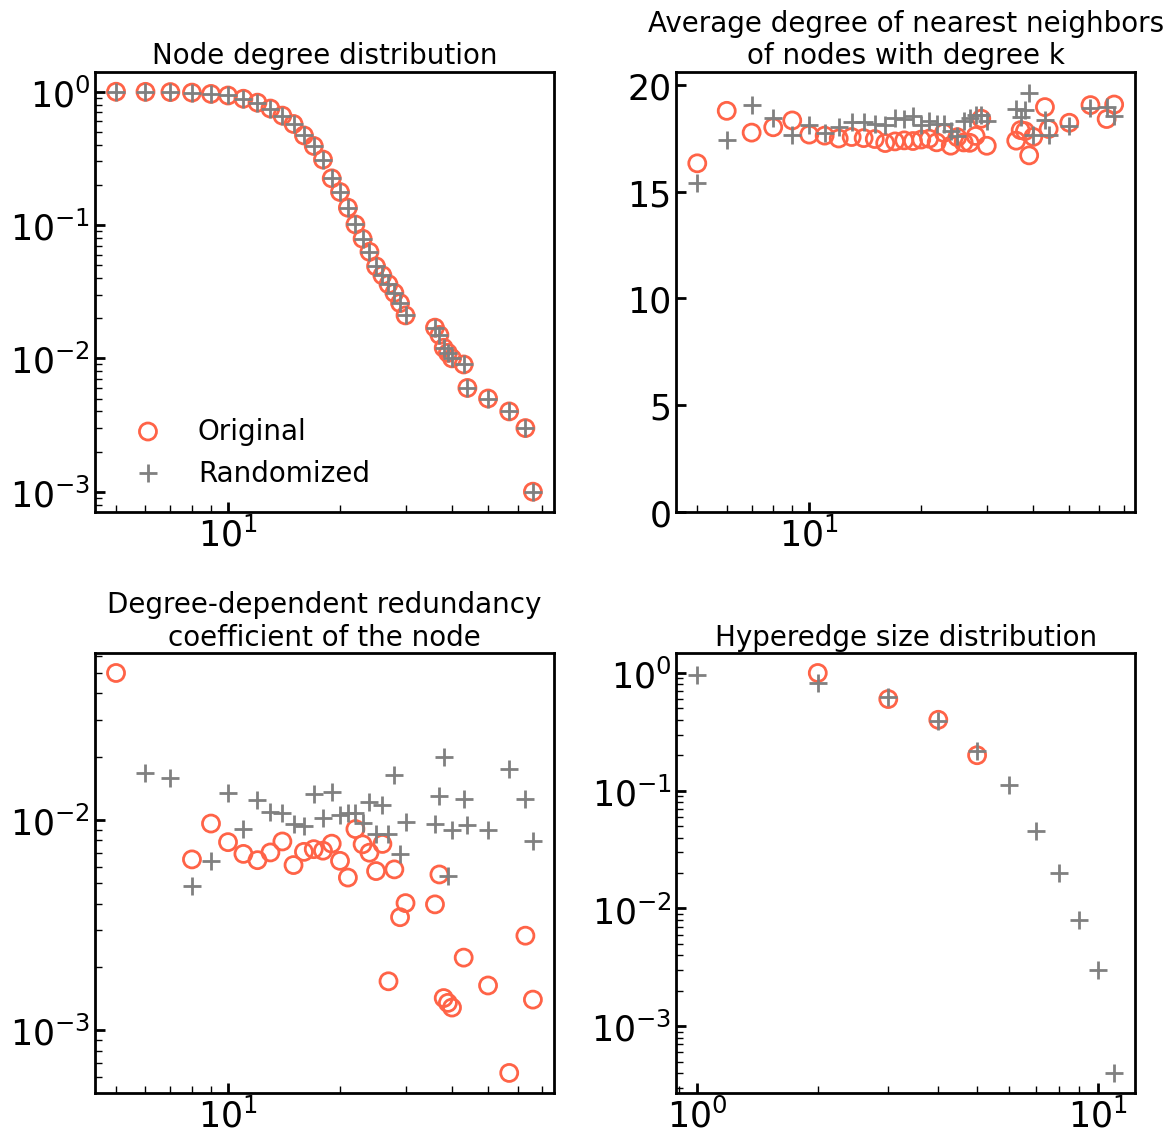

In [6]:
(d_v, d_e) = ("1", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.0071561801506947265
Node redundancy 0.7675847661265873
Hyperedge size distribution 0.6040832666132906
Elapsed time (sec):  27.38472604751587


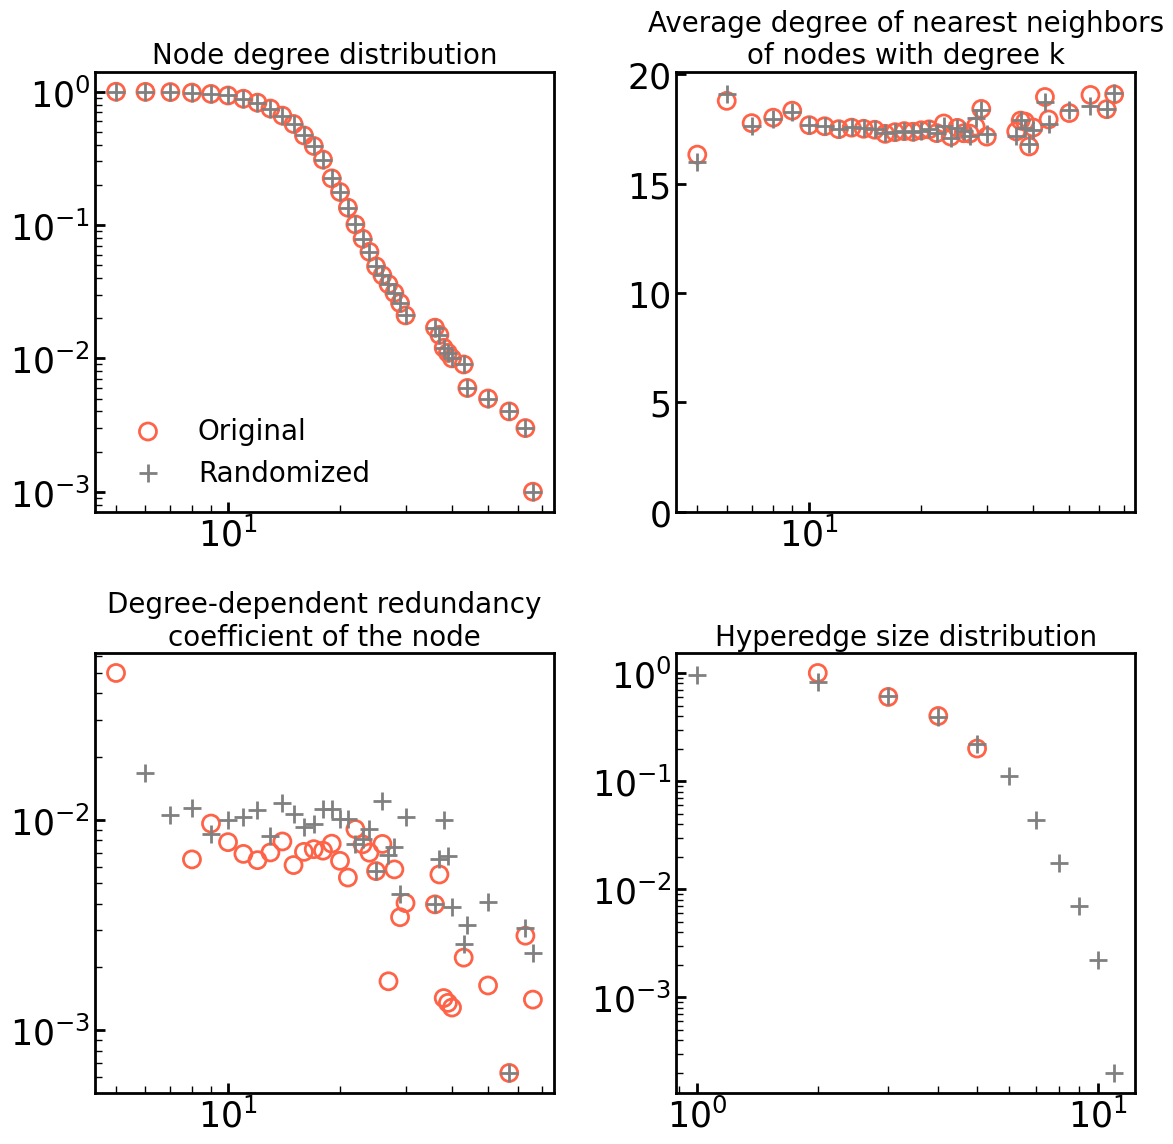

In [7]:
(d_v, d_e) = ("2", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.006768822861690115
Node redundancy 0.00040119634831172905
Hyperedge size distribution 0.5760608486789431
Elapsed time (sec):  67.02343678474426


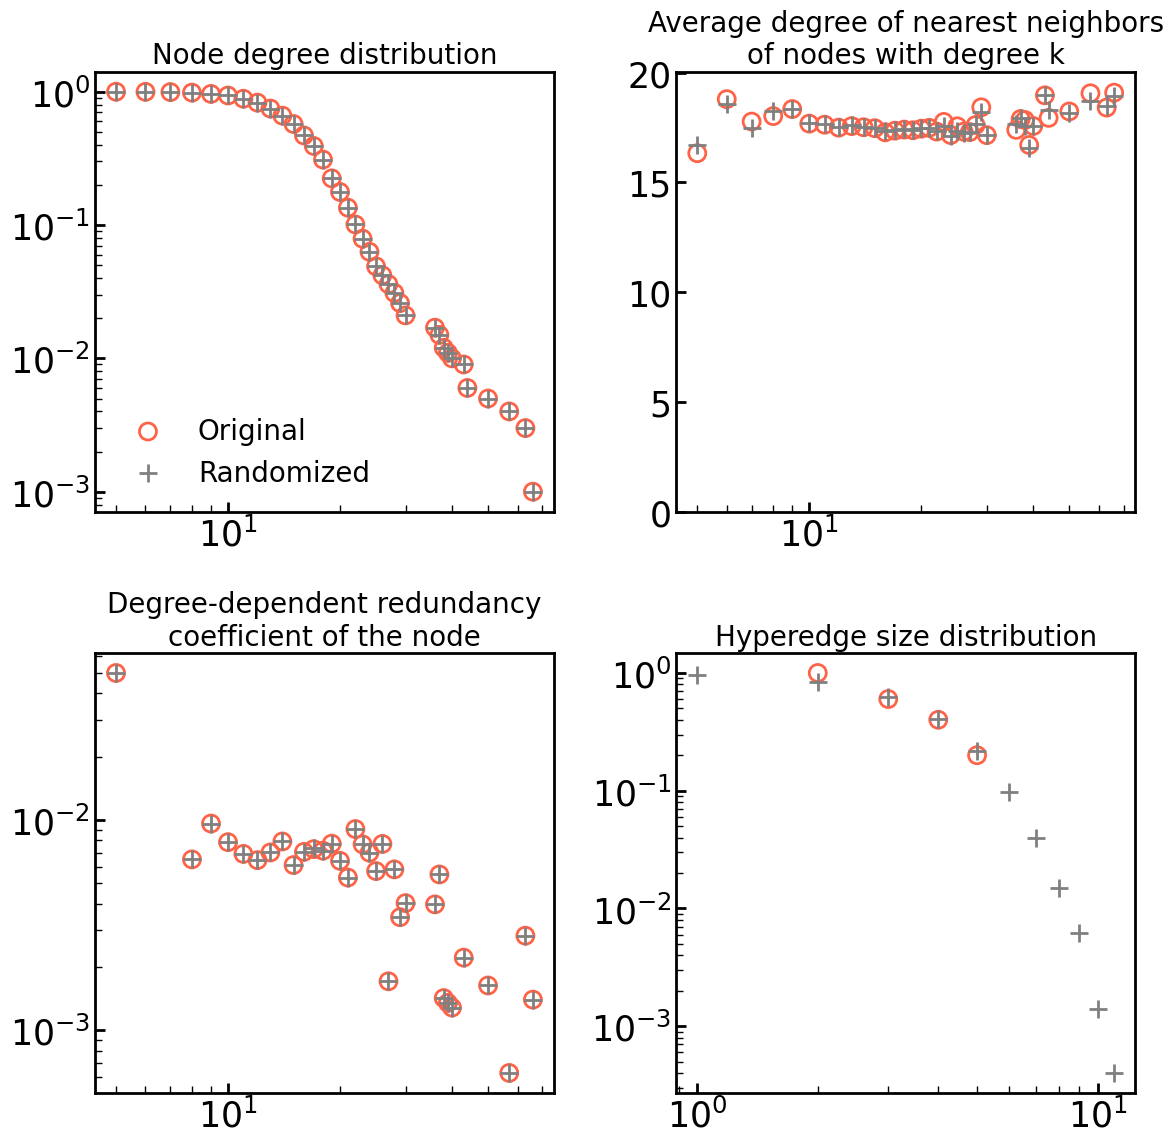

In [8]:
(d_v, d_e) = ("2.5", "0")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.228
Node degree correlation 0.387121356448849
Node redundancy 0.65390354397796
Hyperedge size distribution 0.0
Elapsed time (sec):  0.07064390182495117


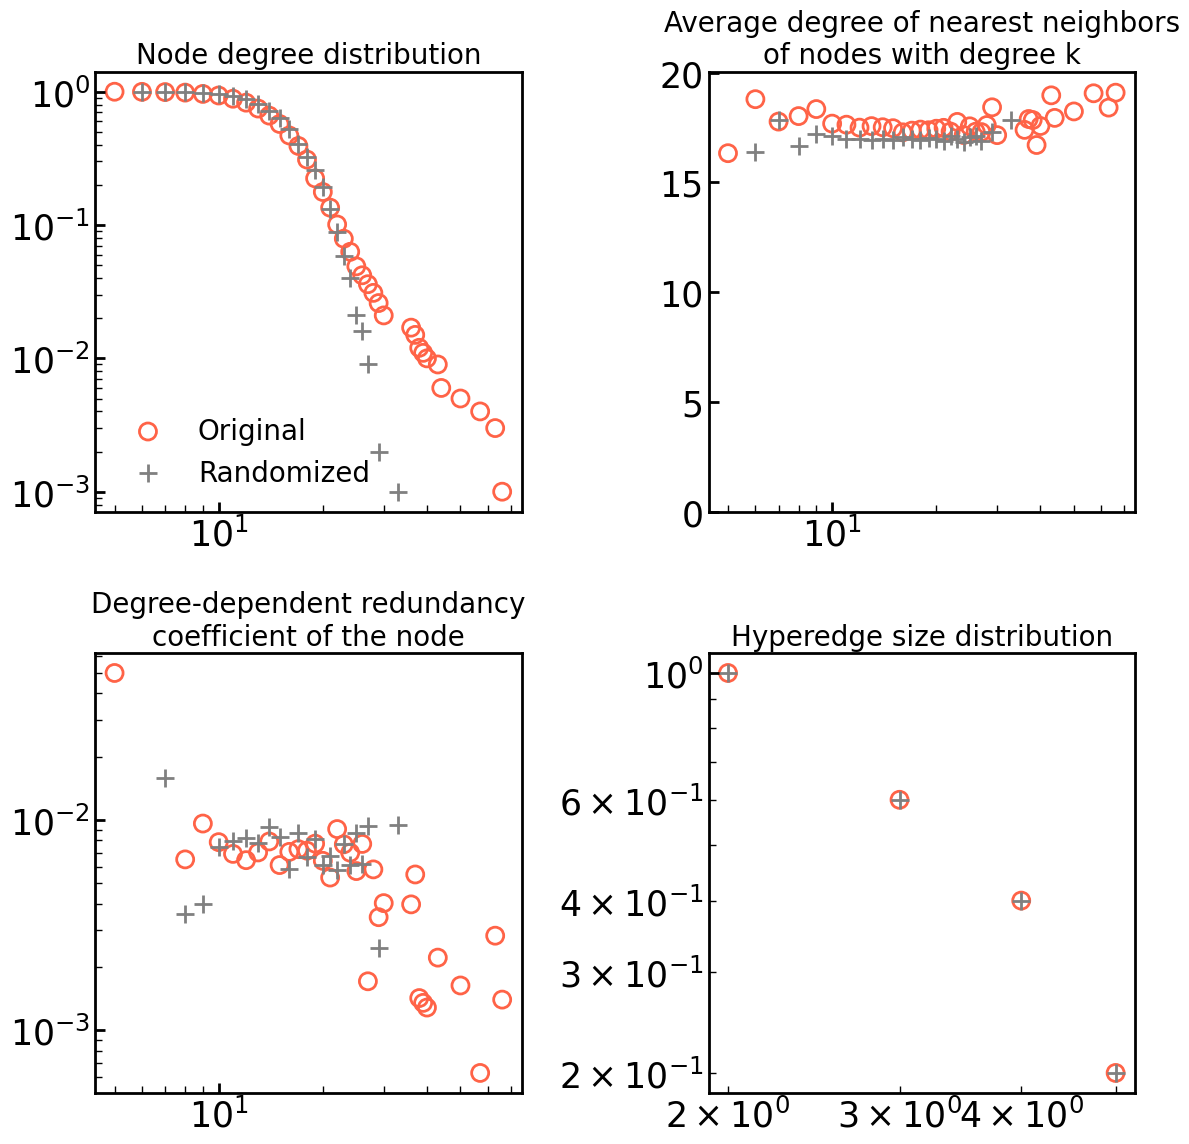

In [9]:
(d_v, d_e) = ("0", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.16917508096780381
Node redundancy 0.8340778024492911
Hyperedge size distribution 0.0
Elapsed time (sec):  0.020527124404907227


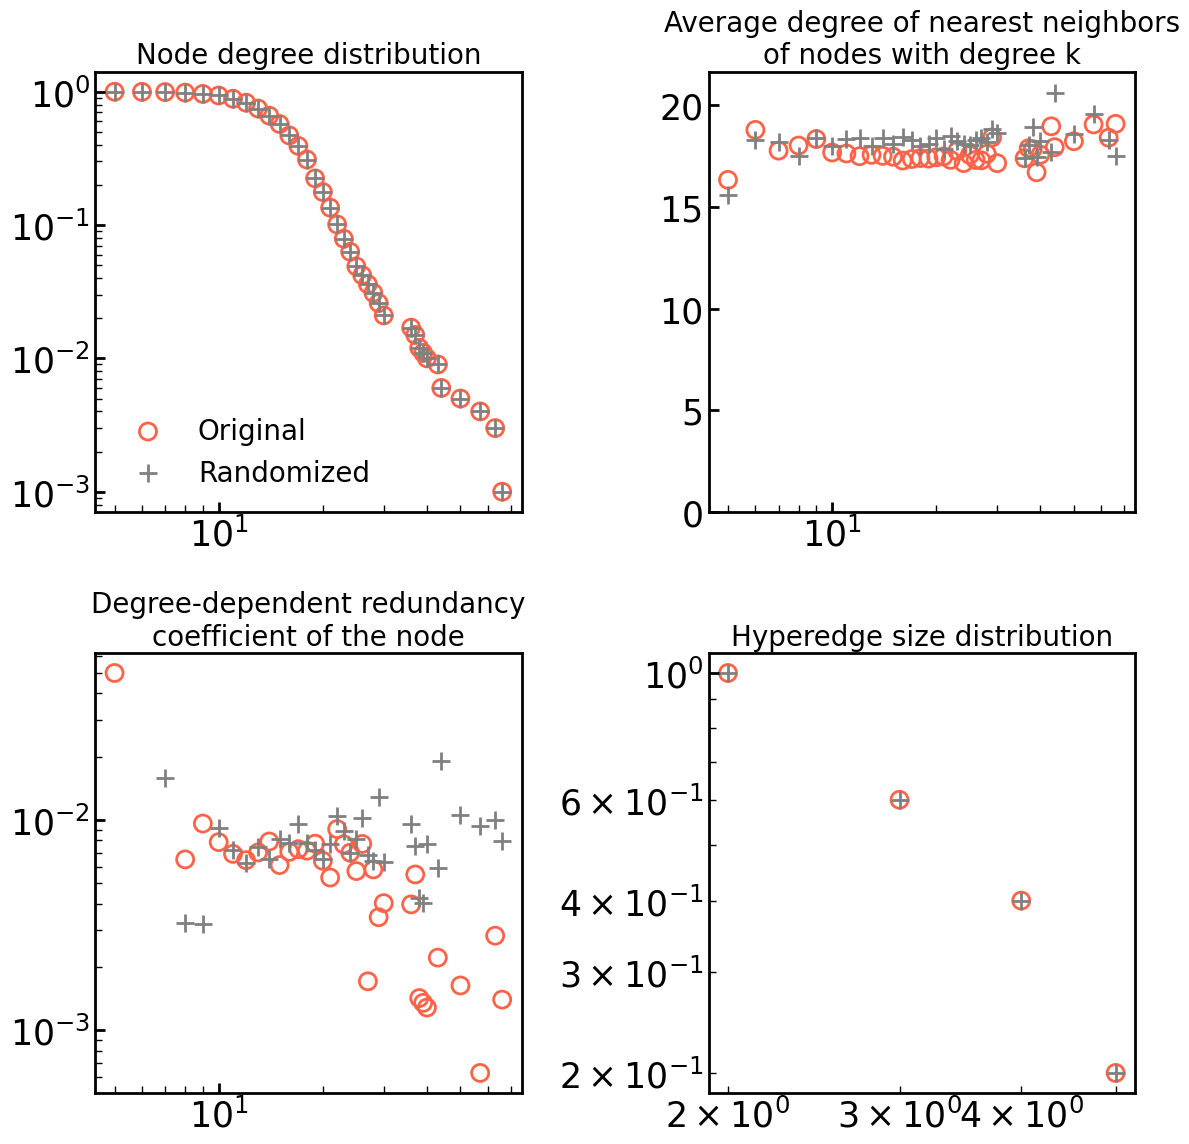

In [10]:
(d_v, d_e) = ("1", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.007525242903410197
Node redundancy 0.5533582733152947
Hyperedge size distribution 0.0
Elapsed time (sec):  23.405352354049683


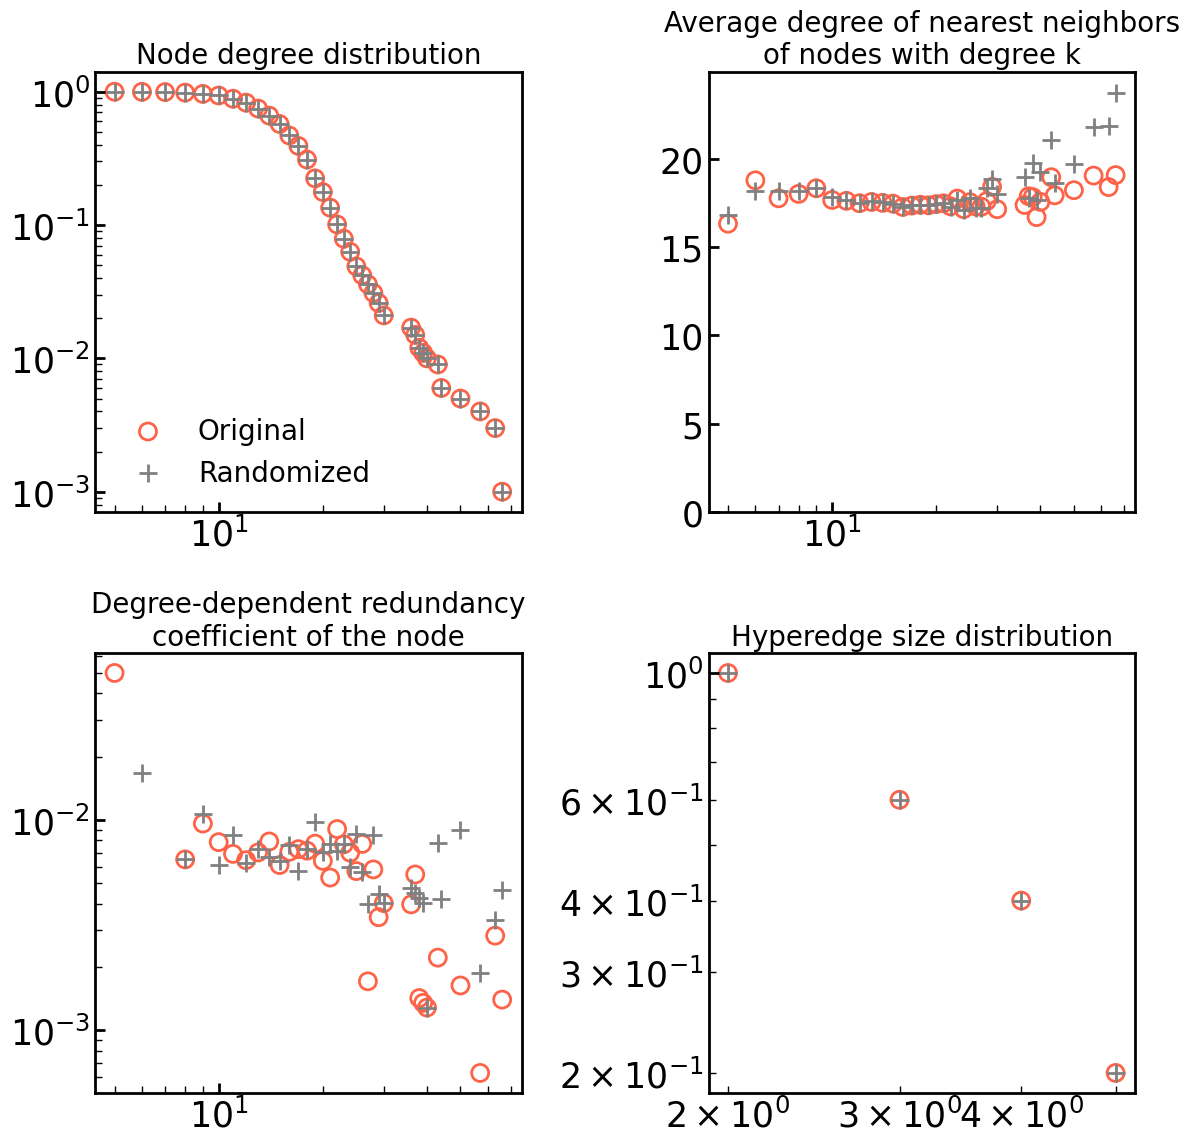

In [11]:
(d_v, d_e) = ("2", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.007048961706991825
Node redundancy 0.009599086429327735
Hyperedge size distribution 0.0
Elapsed time (sec):  60.64501214027405


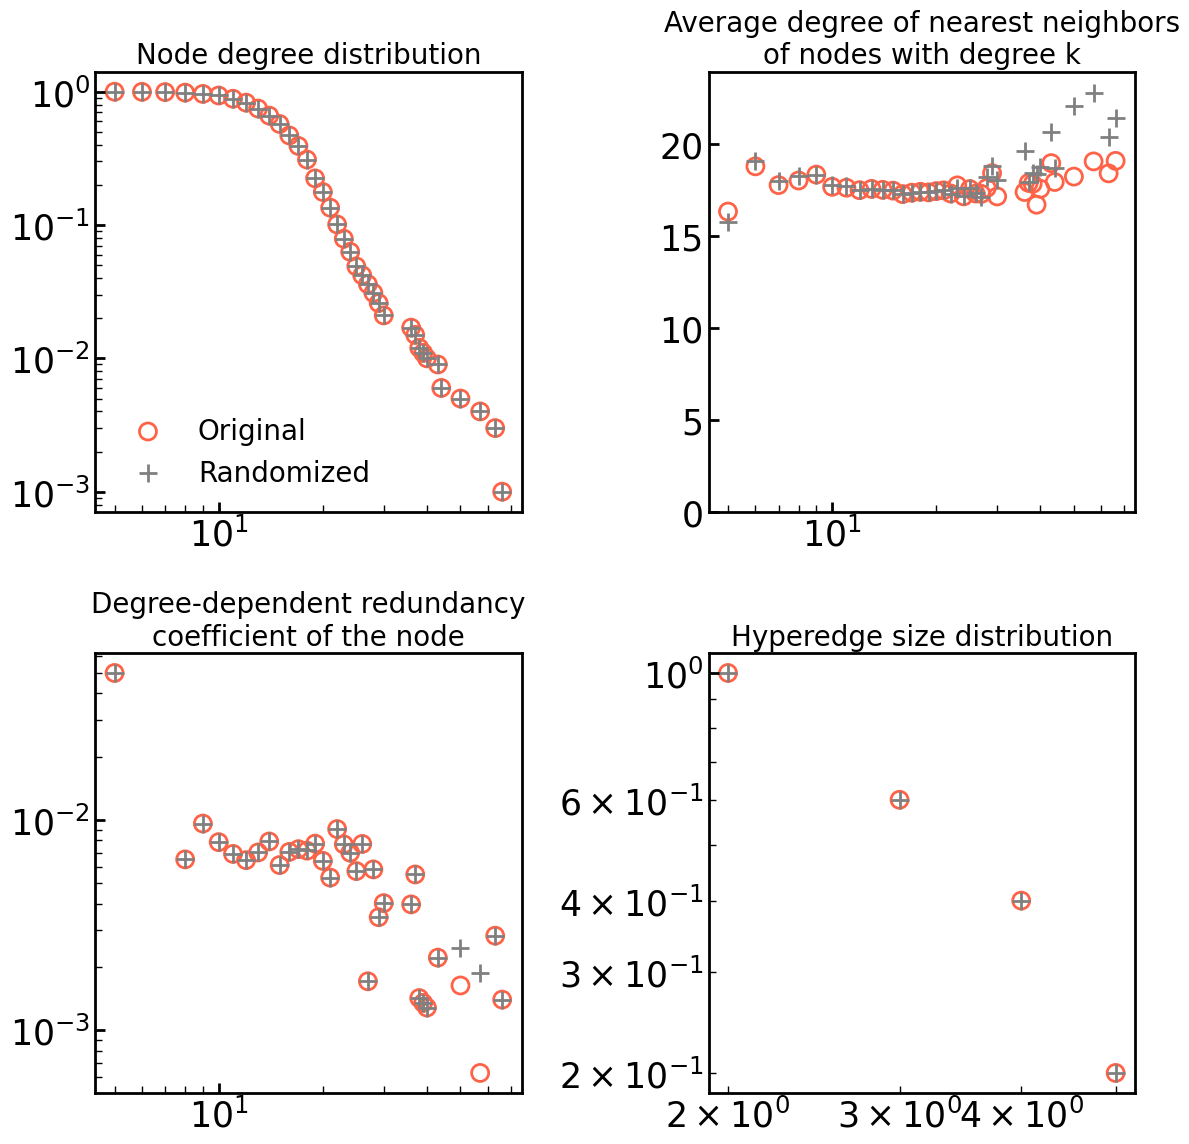

In [12]:
(d_v, d_e) = ("2.5", "1")
t_s = time.time()
randH = randomization.hyper_dk(H, d_v, d_e)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s
randomization.write_randomized_hypergraph(randH, "randomized", d_v, d_e)

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)

Number of nodes 0.0
Number of hyperedges 0.0
Node degree distribution 0.0
Node degree correlation 0.1293579729472287
Node redundancy 0.36785770409208046
Hyperedge size distribution 0.0
Elapsed time (sec):  0.027914047241210938


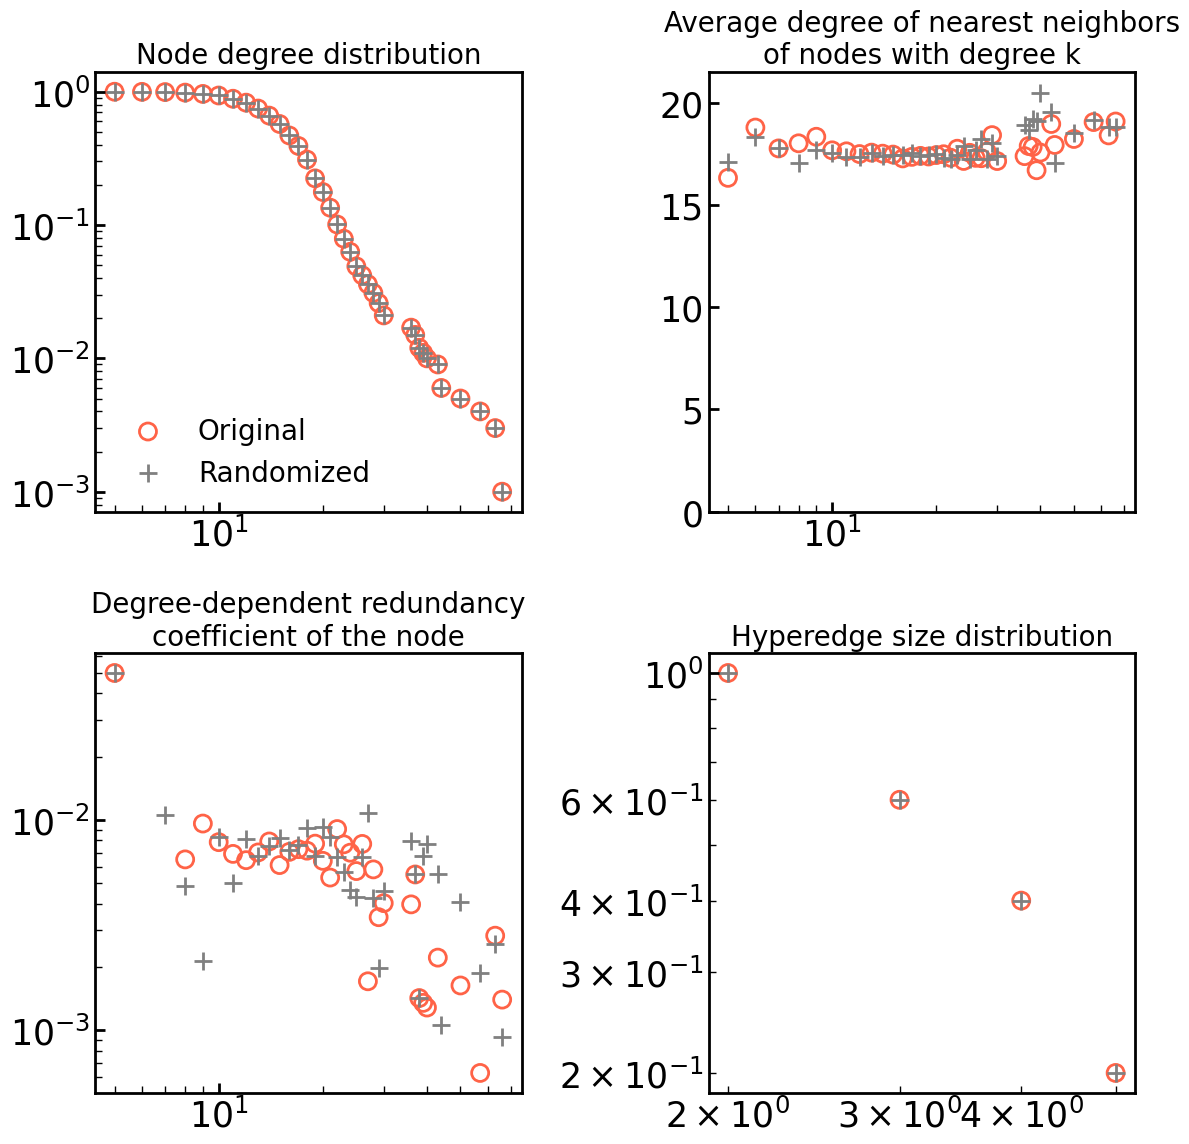

In [13]:
t_s = time.time()
randH = randomization.B2K(H)
t_e = time.time()
randomization.write_randomized_hypergraph(randH, "rand", d_v, d_e)
dist = randomization.get_L1_distance(H, randH)
elapsed = t_e - t_s

for prop in dist:
    print(prop, dist[prop])
    
print("Elapsed time (sec): ", elapsed)

compare_properties(H, randH)